# Задание №2. Производственные функции. Функция Кобба-Дугласа.

## Импорт модулей

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List

%matplotlib inline

## Импорт данных

In [2]:
df = pd.read_excel("./data/usa1936-50.xls")

In [3]:
df.head()

,Экономика США,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Год,ВВП(млн.$),K(млн.$),L(тыс.чел.)
1,1936,83278,234236,73426
2,1937,90884,254890,77568
3,1938,83743,217606,70460
4,1939,91530,221746,75131


In [4]:
years = list(df[df.columns[0]])[1::]
GDP = list(df[df.columns[1]])[1::]
K = list(df[df.columns[2]])[1::]
L = list(df[df.columns[3]])[1::]
M = len(L)

## Задание №1

### 1 часть

In [5]:
def coefficients1(GDP: List[int], K: List[int], L: List[int]) -> List[float]:
    """ Находит коэффициенты в производственной функции Кобба-Дугласа в случае когда у нас `alpha` + `beta` != 1
    
        :param GDP: Gross Domestic Product - ВВП
        :type GDP: List[int]
        :param K: Capital - капитал
        :type K: List[int]
        :param L: Labour - труд
        :type L: List[int]
        
        :return: список со значениями коэффициентов, где позиция: 0 -> `a`, 1 -> `alpha`, 2-> `beta`
        :rtype: List[float]
    """
    log_GDP = np.log(GDP)
    log_K = np.log(K)
    log_L = np.log(L)
    M = len(L)
    B = np.matrix([[M, np.sum(log_K), np.sum(log_L)],
                   [np.sum(log_K), np.sum(log_K**2), np.sum(log_K*log_L)],
                   [np.sum(log_L), np.sum(log_K*log_L), np.sum(log_L**2)]])
    Z = np.matrix([[np.sum(log_GDP)],
                   [np.sum(log_GDP*log_K)],
                   [np.sum(log_GDP*log_L)]])
    return np.array(np.dot(np.linalg.inv(B), Z)).flatten().tolist()

Находим коэффициенты, потенцируем `a` для того чтобы найти истинное значение коэффициента `A`.

In [6]:
a1, alpha1, beta1 = coefficients1(GDP, K, L)
A1 = np.e**a1

In [7]:
def Y(A: float, alpha: float, beta: float, K: List[int], L: List[int]) -> float:
    """ Находит значение производственной функции Кобба-Дугласа
    
        :param A: коэффициент `A`
        :type A: float
        :param alpha: коэффициент `alpha`
        :type alpha: float
        :param beta: коэффициент `beta`
        :type beta: float
        :param K: Capital - капитал
        :type K: List[int]
        :param L: Labour - труд
        :type L: List[int]
        
        :return: значение функции Кобба-Дугласа
        :rtype: float
    """
    return A*K**alpha*L**beta

Проверям работу функции.

In [8]:
Y(A1, alpha1, beta1, K[0], L[0])

87529.18256192551

Получили модельные данны в которых $\alpha + \beta \neq 1$.

In [9]:
modelGDP1 = [Y(A1, alpha1, beta1, K[i], L[i]) for i in range(len(K))]
modelGDP1

[87529.18256192551,
 97861.77500398034,
 80197.7935222183,
 88797.7571289089,
 97991.4245214286,
 119733.64793525869,
 138600.11912201048,
 148331.82271765577,
 145734.5349721207,
 133494.06601823383,
 135126.88656692626,
 144259.46024796166,
 151415.75869893582,
 140048.81022179654,
 153376.28900715473]

### 2 часть

In [10]:
def coefficients2(GDP: List[int], K: List[int], L: List[int]) -> List[float]:
    """ Находит коэффициенты в производственной функции Кобба-Дугласа в случае когда у нас `alpha` + `beta` = 1
    
        :param GDP: Gross Domestic Product - ВВП
        :type GDP: List[int]
        :param K: Capital - капитал
        :type K: List[int]
        :param L: Labour - труд
        :type L: List[int]
        
        :return: список со значениями коэффициентов, где позиция: 0 -> `a`, 1 -> `alpha`
        :rtype: List[float]
    """
    log_KL = np.log(np.array(K)/np.array(L))
    log_YL = np.log(np.array(GDP)/np.array(L))
    B = np.matrix([[M, np.sum(log_KL)],
                   [np.sum(log_KL), np.sum(log_KL**2)]])
    Z = np.matrix([[np.sum(log_YL)],
                   [np.sum(log_YL*log_KL)]])
    return np.array(np.dot(np.linalg.inv(B), Z)).flatten().tolist()

Находим коэффициенты, потенцируем `a` для того чтобы найти истинное значение коэффициента `A` и для того чтобы найти $\beta$ воспользуемся формулой: $\beta = 1 - \alpha$, в силу того, что $\alpha + \beta = 1$.

In [11]:
a2, alpha2 = coefficients2(GDP, K, L)
A2 = np.e**a2
beta2 = 1 - alpha2

Проверям работу функции.

In [12]:
Y(A2, alpha2, beta2, K[0], L[0])

91408.33050108397

Получили модельные данны в которых $\alpha + \beta = 1$.

In [13]:
modelGDP2 = [Y(A2, alpha2, beta2, K[i], L[i]) for i in range(len(K))]
modelGDP2

[91408.33050108397,
 94378.69311505293,
 89940.98101806568,
 99323.9330728209,
 107647.30043949602,
 122827.76185949342,
 135686.26895065862,
 147371.3174195459,
 142127.0249122544,
 131727.02331960798,
 140520.7154262029,
 144907.02967622847,
 138716.6299519837,
 130837.6374054579,
 128732.87085961776]

### График

Строим график для того, чтобы посмотреть как модельные значения отличаются от реальных значений.

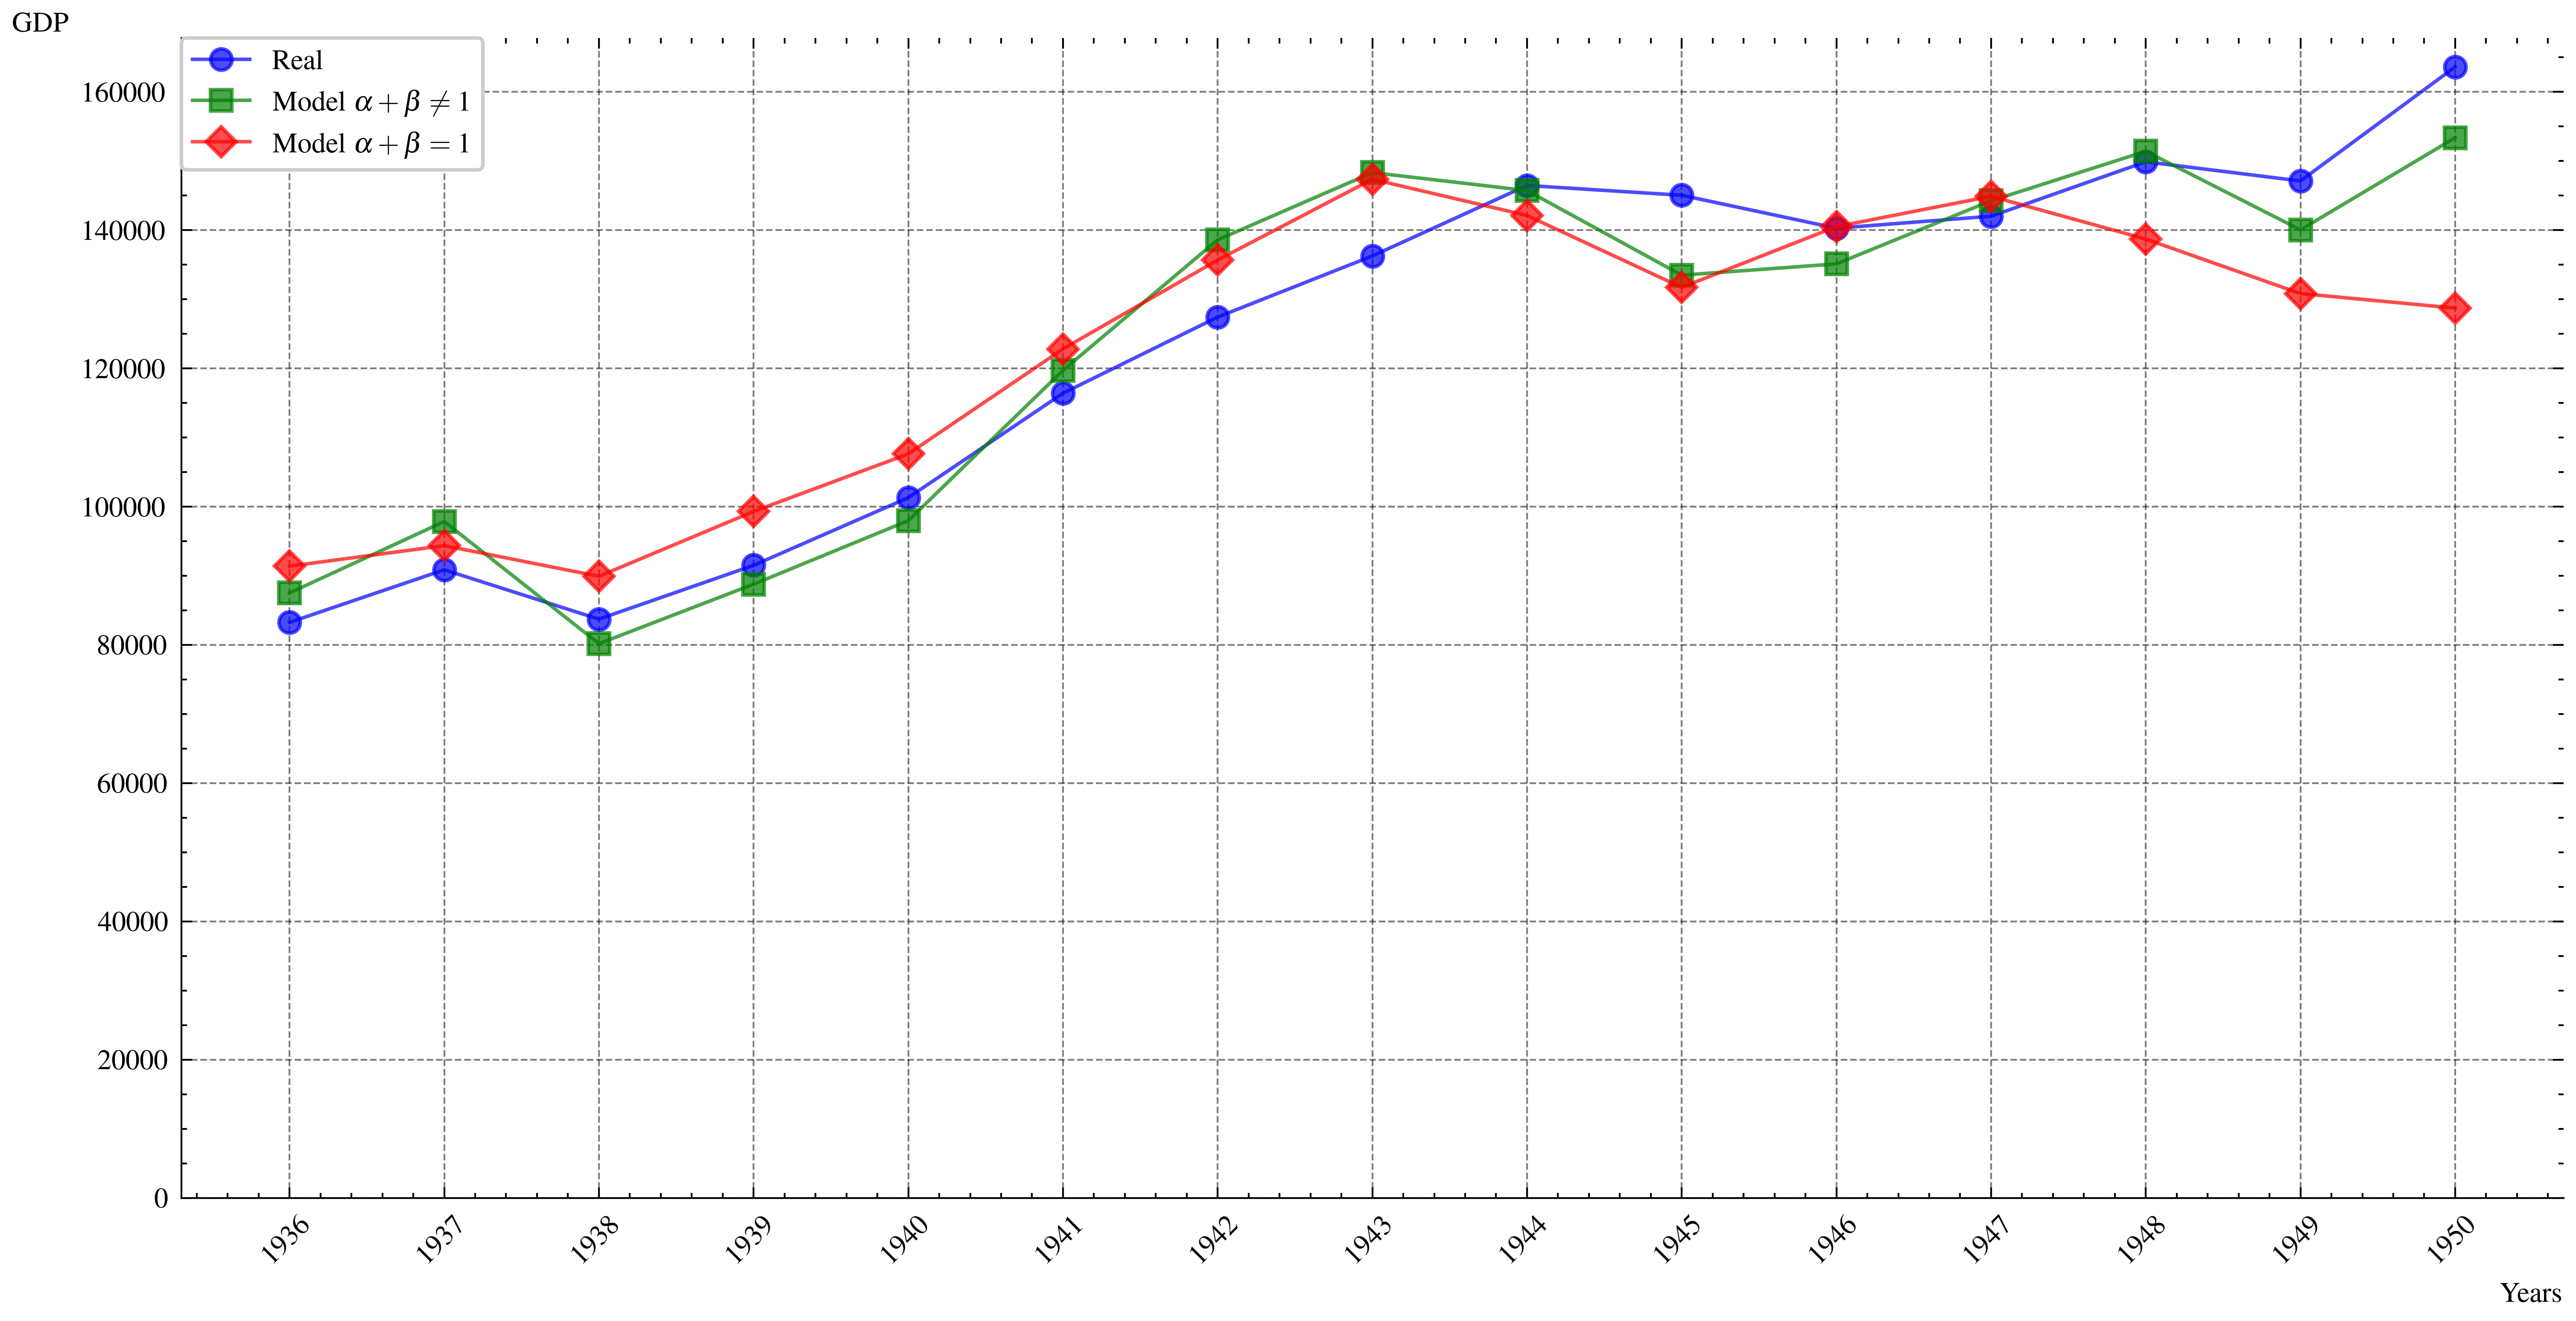

In [14]:
with plt.style.context(["science", "ieee", "grid"]):
    plt.rcParams["figure.figsize"] = [12, 6]
    plt.rcParams["axes.spines.top"] = False
    plt.rcParams["axes.spines.right"] = False
    plt.plot(GDP, "-bo", alpha=0.7)
    plt.plot(modelGDP1, "-gs", alpha=0.7)
    plt.plot(modelGDP2, "-rD", alpha=0.7)
    plt.xticks(np.arange(0, len(L)), years, rotation=45)
    plt.ylim(ymin=0)
    plt.legend([r"Real", r"Model $\alpha + \beta \neq 1$", r"Model $\alpha + \beta = 1$"], borderaxespad=0)
    plt.xlabel("Years", loc="right")
    plt.ylabel("GDP", loc="top", rotation=0)
    plt.savefig("./pics/plot.jpg")
    plt.show()

## Задание №2

### Дано

Нам дано какое-то ВВП:

In [15]:
Y1 = 50000
Y2 = 100000
Y3 = 150000

In [16]:
def cobbDuglas(A: float, alpha: float, beta: float, Y: List[int], K: List[int]) -> float:
    """ Находит Labour (L) труд по входным параметрам
        
        :param A: коэффициент `A`
        :type A: float
        :param alpha: коэффициент `alpha`
        :type alpha: float
        :param beta: коэффициент `beta`
        :type beta: float
        :param Y: GDP - ВВП
        :type Y: List[int]
        :param K: Capital - капитал
        :type K: List[int]
        
        :return: значение функции Кобба-Дугласа
        :rtype: float
    """
    return (Y/(A*K**alpha))**(1/beta)

Находим значения `Labour (L)` труда при заданном капитале.

In [17]:
ys1 = [cobbDuglas(A1, alpha1, beta1, Y1, k) for k in range(100, 200000, 200)]
ys2 = [cobbDuglas(A1, alpha1, beta1, Y2, k) for k in range(100, 200000, 200)]
ys3 = [cobbDuglas(A1, alpha1, beta1, Y3, k) for k in range(100, 200000, 200)]

### Изокванты

С помощью получившихся значений строим изокванты.

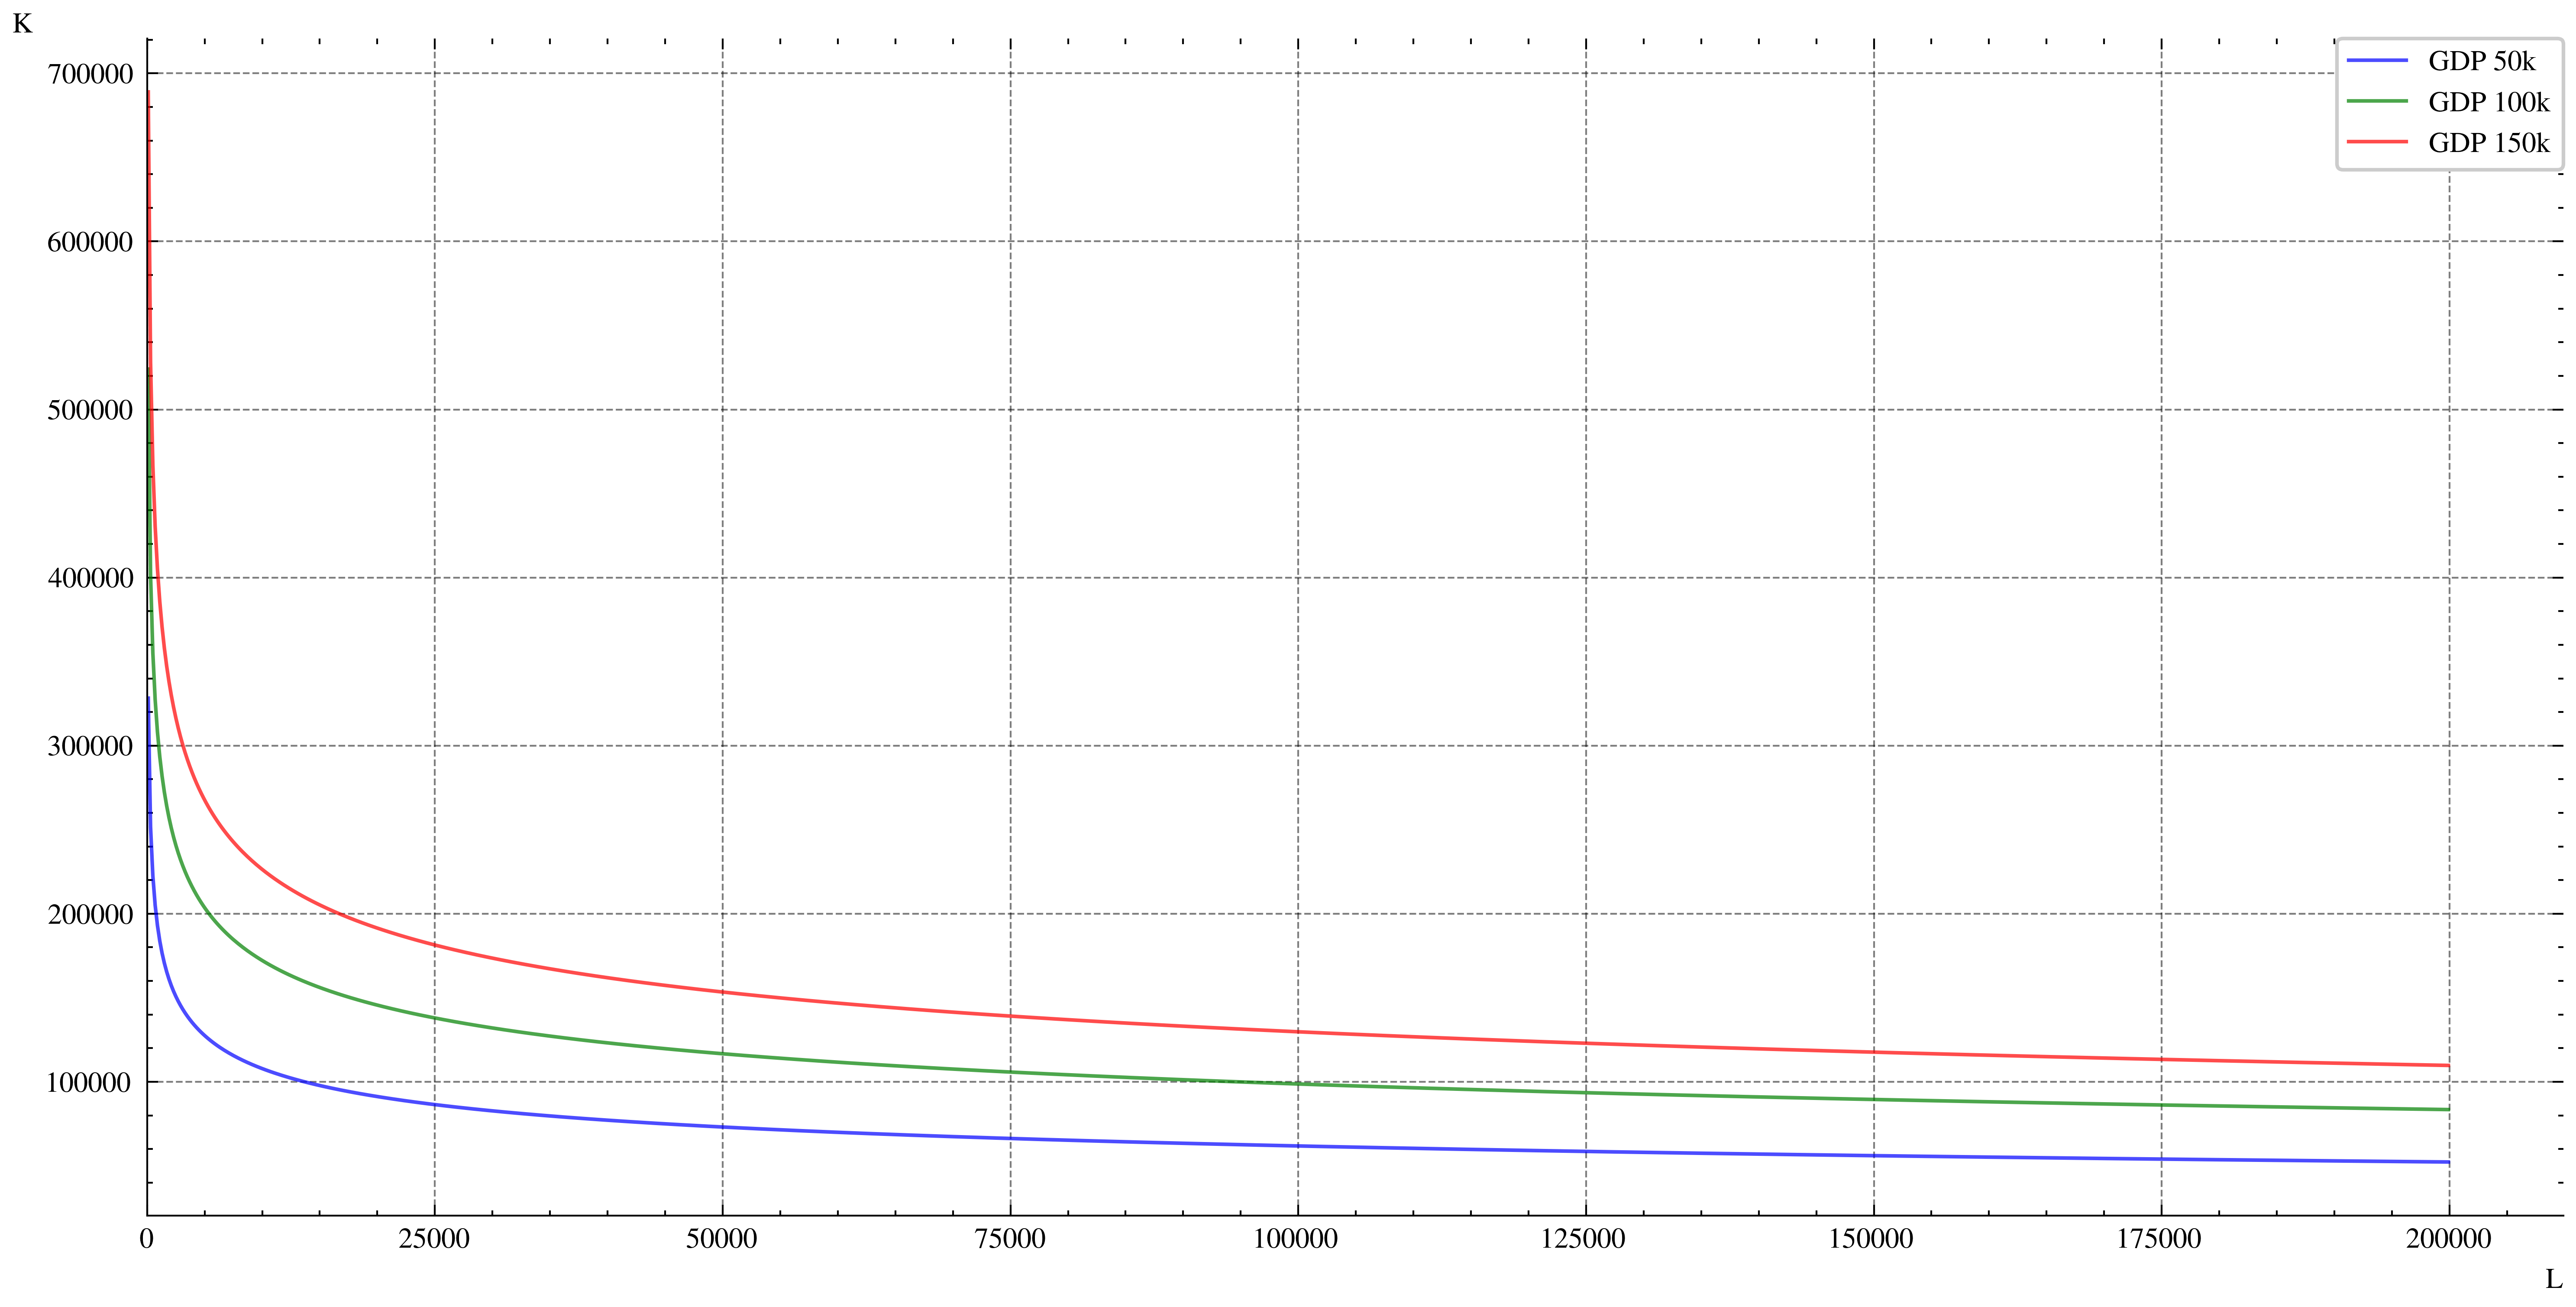

In [21]:
xs = np.arange(100, 200000, 200)
with plt.style.context(["science", "ieee", "grid"]):
    plt.rcParams["figure.figsize"] = [12, 6]
    plt.rcParams["axes.spines.top"] = False
    plt.rcParams["axes.spines.right"] = False
    plt.plot(xs, ys1, "-b", alpha=0.7)
    plt.plot(xs, ys2, "-g", alpha=0.7)
    plt.plot(xs, ys3, "-r", alpha=0.7)
    plt.xlim(xmin=0)
    plt.legend([r"GDP 50k", r"GDP 100k", r"GDP 150k"], borderaxespad=0)
    plt.xlabel("L", loc="right")
    plt.ylabel("K", loc="top", rotation=0)
    plt.savefig("./pics/isoquant.jpg")
    plt.show()